In [245]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import os
os.listdir()
os.chdir('/Users/CHRIS/Downloads/datasets/pumpkinCSV')

path = '/Users/CHRIS/Downloads/datasets/pumpkinCSV'
os.listdir(path)
files = [file for file in os.listdir(path)]
pumpkins = pd.concat(map(pd.read_csv, files), ignore_index=True)
pumpkins


In [246]:
import os
os.listdir()
os.chdir('/Users/CHRIS/Downloads/datasets/pumpkinCSV')

path = '/Users/CHRIS/Downloads/datasets/pumpkinCSV'
os.listdir(path)
files = [file for file in os.listdir(path)]
pumpkins = pd.concat(map(pd.read_csv, files), ignore_index=True)
pumpkins


,Commodity Name,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,...,Appearance,Storage,Crop,Repack,Trans Mode,Offerings,Market Tone,Price Comment,Comments,Unnamed: 0
0,PUMPKINS,ATLANTA,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,09/24/2016,140.00,154.75,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,PUMPKINS,ATLANTA,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,09/24/2016,145.00,154.75,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,PUMPKINS,ATLANTA,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,09/24/2016,150.00,154.75,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,PUMPKINS,ATLANTA,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,09/24/2016,150.00,150.00,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,PUMPKINS,ATLANTA,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,10/01/2016,140.00,154.75,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3509,PUMPKINS,ST. LOUIS,NaN,22 lb cartons,MINIATURE,FLAT TYPE,NaN,09/30/2016,14.75,14.75,...,NaN,NaN,NaN,N,NaN,NaN,LOWER.,NaN,NaN,1752.0
3510,PUMPKINS,ST. LOUIS,NaN,36 inch bins,MINIATURE,ROUND TYPE,NaN,09/26/2016,275.00,275.00,...,NaN,NaN,NaN,N,NaN,NaN,LOWER.,NaN,NaN,1753.0
3511,PUMPKINS,ST. LOUIS,NaN,36 inch bins,MINIATURE,ROUND TYPE,NaN,09/27/2016,275.00,275.00,...,NaN,NaN,NaN,N,NaN,NaN,STEADY.,NaN,NaN,1754.0
3512,PUMPKINS,ST. LOUIS,NaN,36 inch bins,MINIATURE,ROUND TYPE,NaN,09/28/2016,275.00,275.00,...,NaN,NaN,NaN,N,NaN,NaN,ABOUT STEADY.,NaN,NaN,1755.0


In [247]:
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]

new_columns = ['Package', 'Variety', 'City Name', 'Month', 'Low Price', 'High Price', 'Date']
pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns], axis=1)

price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2

month = pd.DatetimeIndex(pumpkins['Date']).month
day_of_year = pd.to_datetime(pumpkins['Date']).apply(lambda dt: (dt-datetime(dt.year,1,1)).days)

new_pumpkins = pd.DataFrame(
    {'Month': month, 
     'DayOfYear' : day_of_year, 
     'Variety': pumpkins['Variety'], 
     'City': pumpkins['City Name'], 
     'Package': pumpkins['Package'], 
     'Low Price': pumpkins['Low Price'],
     'High Price': pumpkins['High Price'], 
     'Price': price})

new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/(1+1/9)
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price/(1/2)

new_pumpkins.head()

,Month,DayOfYear,Variety,City,Package,Low Price,High Price,Price
35,11,309,PIE TYPE,ATLANTA,1 1/9 bushel cartons,14.5,15.0,13.275
36,11,316,PIE TYPE,ATLANTA,1 1/9 bushel cartons,14.5,15.0,13.275
37,11,323,PIE TYPE,ATLANTA,1 1/9 bushel cartons,14.5,15.0,13.275
38,11,330,PIE TYPE,ATLANTA,1 1/9 bushel cartons,14.5,15.0,13.275
56,9,272,MINIATURE,ATLANTA,1 1/9 bushel cartons,16.5,18.0,15.525


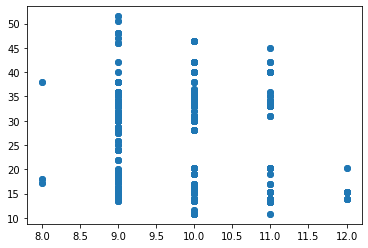

In [248]:
plt.scatter('Month','Price',data=new_pumpkins)

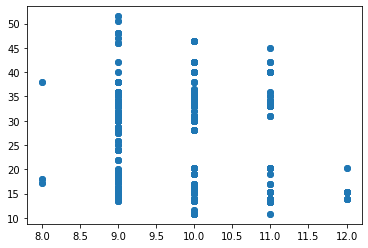

In [249]:
price = new_pumpkins.Price
month = new_pumpkins.Month
plt.scatter( month, price)

plt.show()

<AxesSubplot:xlabel='Month'>

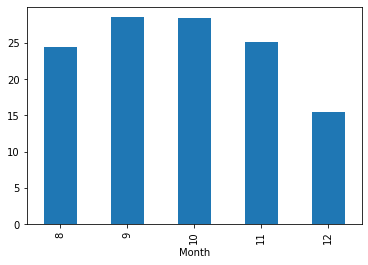

In [250]:
new_pumpkins.groupby(['Month'])['Price'].mean().plot(kind = 'bar' )
#plt.ylabel('pumpkin price')

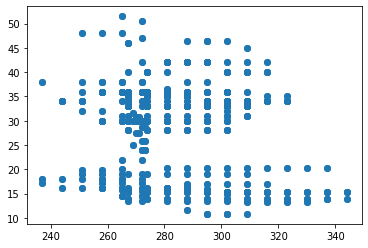

In [251]:
plt.scatter('DayOfYear','Price', data=new_pumpkins)


In [252]:
new_pumpkins.Package.unique()

array(['1 1/9 bushel cartons', '1/2 bushel cartons',
       '1 1/9 bushel crates', 'bushel cartons', 'bushel baskets'],
      dtype=object)

In [253]:
new_pumpkins = pd.get_dummies(new_pumpkins, columns=['Month','Package', 'Variety', 'City'])

In [254]:
new_pumpkins.head()

,DayOfYear,Low Price,High Price,Price,Month_8,Month_9,Month_10,Month_11,Month_12,Package_1 1/9 bushel cartons,...,City_ATLANTA,City_BALTIMORE,City_BOSTON,City_CHICAGO,City_COLUMBIA,City_DETROIT,City_NEW YORK,City_PHILADELPHIA,City_SAN FRANCISCO,City_ST. LOUIS
35,309,14.5,15.0,13.275,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,0
36,316,14.5,15.0,13.275,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,0
37,323,14.5,15.0,13.275,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,0
38,330,14.5,15.0,13.275,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,0
56,272,16.5,18.0,15.525,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


In [255]:
new_pumpkins.drop(['Month_12','Package_bushel cartons','Variety_PIE TYPE', 'City_ST. LOUIS'], axis=1, inplace = True)


In [256]:
new_pumpkins.head()

,DayOfYear,Low Price,High Price,Price,Month_8,Month_9,Month_10,Month_11,Package_1 1/9 bushel cartons,Package_1 1/9 bushel crates,...,Variety_MIXED HEIRLOOM VARIETIES,City_ATLANTA,City_BALTIMORE,City_BOSTON,City_CHICAGO,City_COLUMBIA,City_DETROIT,City_NEW YORK,City_PHILADELPHIA,City_SAN FRANCISCO
35,309,14.5,15.0,13.275,0,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0
36,316,14.5,15.0,13.275,0,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0
37,323,14.5,15.0,13.275,0,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0
38,330,14.5,15.0,13.275,0,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0
56,272,16.5,18.0,15.525,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [257]:
X = new_pumpkins.drop('Price', axis=1)
y = new_pumpkins['Price']

In [258]:
from sklearn import linear_model, model_selection

In [259]:
X_train,X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.20) 

In [260]:
model =linear_model. LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [261]:
y_pred = model.predict(X_test)

In [262]:
X_test.shape, y_test.shape

((166, 23), (166,))

In [263]:
y_pred

array([15.83018824, 17.76387236,  9.17790842, 15.85589225, 16.10595006,
       15.04813844, 33.89583543, 33.17809819, 34.01663496, 15.02500485,
       14.98027414, 30.35609507, 29.36315735, 15.04013101, 34.6786538 ,
       33.85577383, 36.55638159, 15.07839076, 15.87556672, 41.65541921,
       13.45657529, 19.26274049, 18.37421872, 13.4868276 , 34.04905999,
       22.05805091, 43.23959381, 36.54125543, 15.14799548, 16.48283756,
       13.02329153, 40.34650769, 14.45643352, 33.24894275, 34.6027501 ,
       35.3055991 , 16.23552885, 31.02218652, 30.41659971, 18.37421872,
       14.96956637, 34.61787626, 27.91503475, 35.3055991 , 13.9103322 ,
       15.07839076, 34.63277587, 41.67054536, 15.86044056, 41.67054536,
       15.20899958, 13.00816537, 15.85589225, 40.28600305,  9.11479145,
       31.63327971, 18.76573987, 15.03301228, 34.10385948, 16.23547501,
       12.48312756, 18.23255149, 16.03066234, 36.57150775, 33.29308139,
       33.21869043, 16.01553619, 22.08830323, 36.55638159, 18.79

In [264]:
y_test

1360    15.300
709     17.100
1221    10.800
2431    15.750
1418    16.200
         ...  
2785    36.000
3164    40.000
378     13.950
35      13.275
2737    19.000
Name: Price, Length: 166, dtype: float64

In [265]:
np.corrcoef(y_pred, y_test)

array([[1.        , 0.99590845],
       [0.99590845, 1.        ]])

In [273]:
accuracy =  (scipy.stats.spearmanr(y_pred, y_test))


SpearmanrResult(correlation=0.9954685937534152, pvalue=1.624022865237349e-169)